In [6]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colwidth' , None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import numpy as np
import matplotlib as plt
from matplotlib.pylab import rcParams
import seaborn as sns

In [7]:
%matplotlib inline
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report


In [9]:
pip install -q --upgrade pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -q --upgrade yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [11]:
import warnings

In [12]:
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd 
df = pd.read_csv('C:\\Users\\maity\\OneDrive\\Desktop\\asdfg\\creditcard.csv')

In [14]:
print('Data Shape:' ,df.shape)

Data Shape: (284807, 31)


In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,0.87625,0.84934,0.83818,0.81404,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,-14.12985,-25.16280,-9.49875,-7.21353,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,-0.46804,-0.48375,-0.49885,-0.45630,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,0.06641,-0.06568,-0.00364,0.00373,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,0.52330,0.39967,0.50081,0.45895,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,17.31511,9.25353,5.04107,5.59197,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


In [17]:
df.info(verbose=True, memory_usage= 'deep',null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
before_shape = df.shape
print('Data Shape [Before]:' , before_shape)

Data Shape [Before]: (284807, 31)


In [19]:
df.drop_duplicates(inplace= True)

In [20]:
after_shape = df.shape

In [21]:
print('Data Shape [After]:' ,after_shape)
drop_nums = ('Data Shape[After]:', after_shape)

Data Shape [After]: (283726, 31)


In [22]:
drop_nums = before_shape[0] - after_shape[0]

In [23]:
import numpy as np
drop_percent = np.round(drop_nums / before_shape[0] ,decimals=5)*100
print('Drop Ratio:', drop_percent, '%')

Drop Ratio: 0.38 %


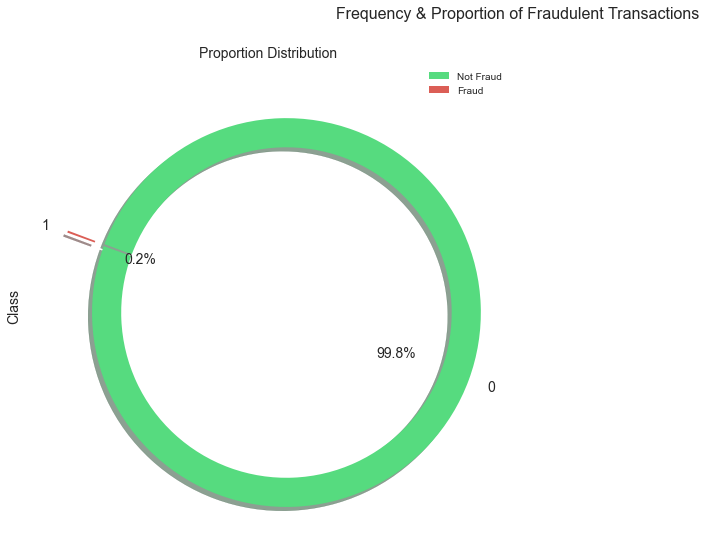

In [41]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
#sns.countplot(x = 'Class', df = df, palette = ['#56DB7F', '#DB5E56'])
#plt.xlabel(xlabel = 'Class', size = 14)
#plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

#plt.subplot(1, 2, 2)
space = np.ones(2)/10
df['Class'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel(ylabel = 'Class', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

In [48]:
df['Time(in Hours)'] = df['Time']/3600

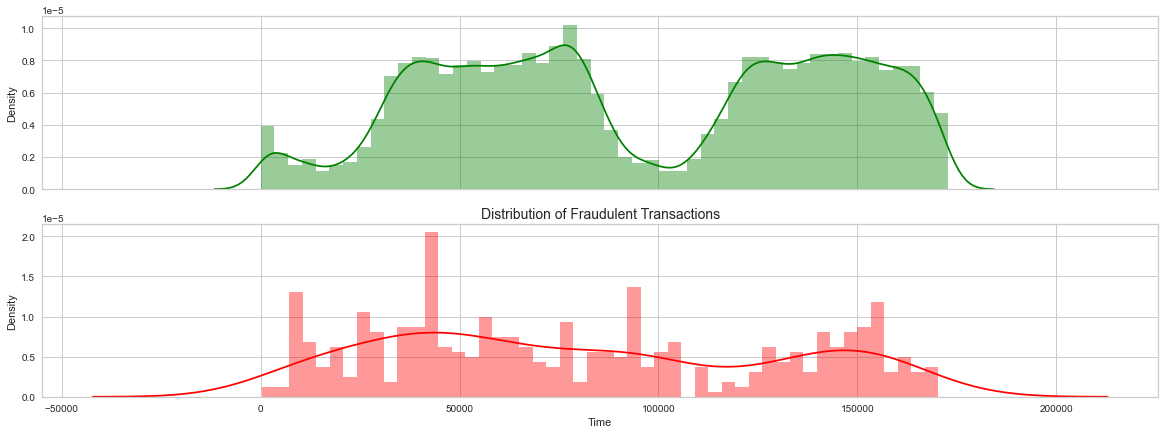

In [56]:
nonFraud = df['Time'][df['Class']==0]
fraud = df['Time'][df['Class']==1]
fig ,(ax1 , ax2) = plt.subplots(nrows = 2, ncols = 1 , sharex = True, figsize = (20,7))


sns.distplot(a = nonFraud , bins = 50, ax = ax1, color = 'green')


sns.distplot(a = fraud ,bins = 50 , ax = ax2 , color = 'red')
ax2.set_title(label ='Distribution of Fraudulent Transactions' , size = 14)
plt.show()

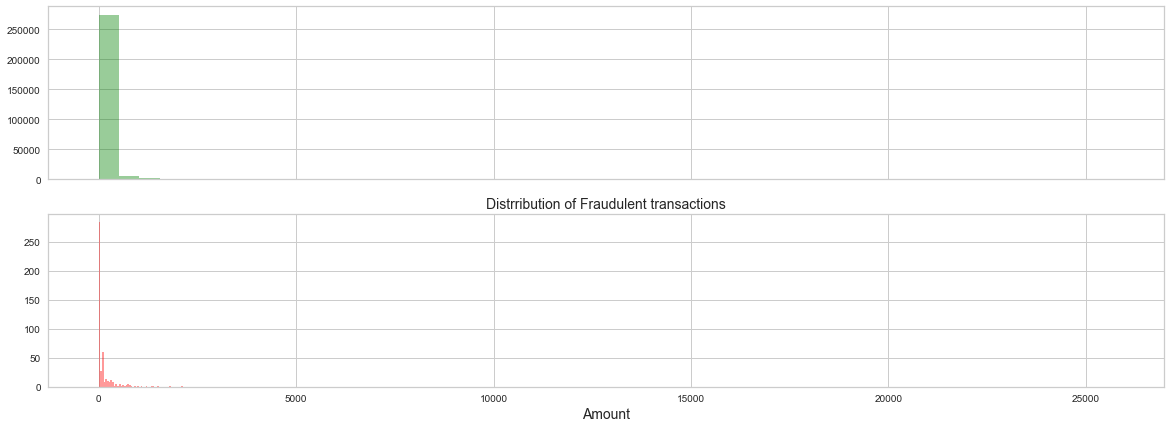

In [61]:
nonFraud = df['Amount'][df['Class']==0]
fraud = df['Amount'][df['Class']==1]
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(20,7))
sns.distplot(a=nonFraud, bins=50, kde= False, ax=ax1, color='green')#
#ax1=set_xlabel(xlabel='')
sns.distplot(a = fraud , bins=50,kde=False, ax=ax1, color='green')
ax1.set_xlabel(xlabel='')
sns.distplot(a =  fraud , bins = 50,kde=False, ax = ax2 , color = 'red')
ax2.set_title(label = 'Distrribution of Fraudulent transactions' , size = 14)
ax2.set_xlabel(xlabel = 'Amount' , size = 14)
plt.show()


In [69]:
print('Fraudulent transactions:' , len(fraud[fraud>100]))

Fraudulent transactions: 125


In [77]:
X= df.drop('Class' , axis = 1 )
y = df['Class']

In [78]:
#import the functioning algorithm libraries
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier   

In [79]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state= 42,n_jobs= -1))
selector.fit(X,y)
selected_feat = X.columns[(selector.get_support())].tolist()
print('Total feature selected are ',len(selected_feat))
print('Threshold set by Model' , np.round(selector.threshold_,decimals = 2))
print('Features:', selected_feat)

Total feature selected are  7
Threshold set by Model 0.03
Features: ['V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


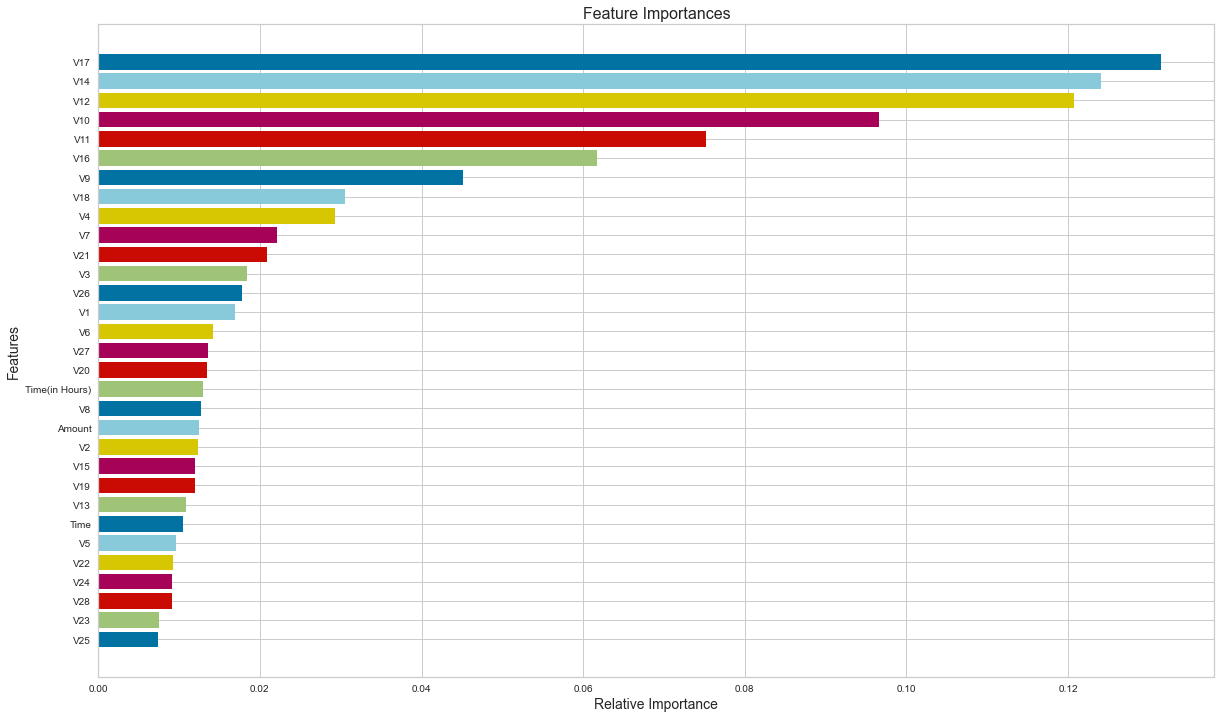

In [80]:
figure = plt.figure(figsize = [20, 12])
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y )
plt.xlabel('Relative Importance' , size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [82]:
#data splitting and training
X = df[selected_feat]
y = df['Class']

In [83]:
X_train , X_test,y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify= y)
print('Training data shape:' , X_train.shape, y_train.shape)
print('Testing data shape:' , X_test.shape, y_test.shape)

Training data shape: (255353, 7) (255353,)
Testing data shape: (28373, 7) (28373,)


In [85]:
import numpy as np
def plot_recision_recall(y_true, y_pred, y_pred_test):
    precisions, recalls,thresholds = precision_recall_curve(y_true = y_true , probas_pred = y_pred)
    average_precision = np.mean(precisions)
    average_precision = np.mean(recalls)
    sns.lineplot(x = recalls,  y = precisions , linewidth = 2,ci = None)
    plt.plot([0,1] , [average_precision, average_precision], 'r-')
    plt.plot([average_recall , average_recall], 'g-')
    plt.plot('Recall', frontsize = 14)
    plt.xticks(ticks = [ 0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8, 0.9,1.0])
    plt.yticks(ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.xlabel('Precision', fontsize = 14)
    plt.title(train_or_test, fontsize = 16)
    plt.legend(labels = ['Binary PR curve' , 'AP {:.2f}'.format(average_recall)])
    plt.grid(True)
    

In [98]:
naive = GaussianNB()
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

In [102]:


logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test,y_test_pred_count)
print('Training report')
print(logistic_report_train)
print('Testing report')
print(logistic_report_test)

Training report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    254927
           1       0.16      0.84      0.27       426

    accuracy                           0.99    255353
   macro avg       0.58      0.92      0.63    255353
weighted avg       1.00      0.99      0.99    255353

Testing report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28326
           1       0.16      0.87      0.27        47

    accuracy                           0.99     28373
   macro avg       0.58      0.93      0.63     28373
weighted avg       1.00      0.99      0.99     28373

